## Данные

Данные в [архиве](https://drive.google.com/file/d/15o7fdxTgndoy6K-e7g8g1M2-bOOwqZPl/view?usp=sharing). В нём два файла:
- `news_train.txt` тренировочное множество
- `news_test.txt` тренировочное множество

С некоторых новостных сайтов были загружены тексты новостей за период  несколько лет, причем каждая новость принаделжит к какой-то рубрике: `science`, `style`, `culture`, `life`, `economics`, `business`, `travel`, `forces`, `media`, `sport`.

В каждой строке файла содержится метка рубрики, заголовок новостной статьи и сам текст статьи, например:

>    **sport**&nbsp;&lt;tab&gt;&nbsp;**Сборная Канады по хоккею разгромила чехов**&nbsp;&lt;tab&gt;&nbsp;**Сборная Канады по хоккею крупно об...**

# Задача

1. Обработать данные, получив для каждого текста набор токенов
Обработать токены с помощью (один вариант из трех):
    - pymorphy2
    - русского [snowball стеммера](https://www.nltk.org/howto/stem.html)
    - [SentencePiece](https://github.com/google/sentencepiece) или [Huggingface Tokenizers](https://github.com/huggingface/tokenizers)
    
    
2. Обучить word embeddings (fastText, word2vec, gloVe) на тренировочных данных. Можно использовать [gensim](https://radimrehurek.com/gensim/models/word2vec.html) . Продемонстрировать семантические ассоциации. 

3. Реализовать алгоритм классификации, посчитать точноть на тестовых данных, подобрать гиперпараметры. Метод векторизации выбрать произвольно - можно использовать $tf-idf$ с понижением размерности (см. scikit-learn), можно использовать обученные на предыдущем шаге векторные представления, можно использовать [предобученные модели](https://rusvectores.org/ru/models/). Имейте ввиду, что простое "усреднение" токенов в тексте скорее всего не даст положительных результатов. Нужно реализовать два алгоритмов из трех:
     - SVM
     - наивный байесовский классификатор
     - логистическая регрессия
    

4.* Реализуйте классификацию с помощью нейросетевых моделей. Например [RuBERT](http://docs.deeppavlov.ai/en/master/features/models/bert.html) или [ELMo](https://rusvectores.org/ru/models/).

lines = list(open('./news_train.txt', 'r', encoding='utf-8'))

In [14]:
import random
random.shuffle(lines)

In [18]:
with open('./news_test.txt', 'w', encoding='utf-8') as f:
    for line in lines[15000:18000]:
        f.write(line)

In [16]:
from collections import Counter

Counter([line.split('\t')[0] for line in lines[:15000]])

Counter({'sport': 2215,
         'culture': 2053,
         'science': 2156,
         'media': 2111,
         'economics': 2080,
         'life': 2033,
         'forces': 1225,
         'travel': 289,
         'style': 284,
         'business': 554})

In [ ]:
'https://drive.google.com/file/d/1mG3tPS_59pANrgwd6T2IgnHWgph4vYbg/view?usp=sharing'

In [7]:
with open("./data/news_train.txt") as f:
    lines = f.readlines()

In [12]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

def text_cleaner(text):
    # к нижнему регистру
    text = text.lower()
    
    # оставляем в предложении только русские буквы
    alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
    
    cleaned_text = ''
    for char in text:
        if (char.isalpha() and char[0] in alph) or (char == ' '):
            cleaned_text += char
        
    result = []
    for word in cleaned_text.split():
        # лемматизируем
        result.append(morph.parse(word)[0].normal_form)
                              
    return ' '.join(result)

In [16]:
extr = lambda x: [line.split('\t')[x] for line in lines]

with open('./data/cleaned_news_train.txt', 'w+') as f:
    for (tg, ttl, txt) in zip(extr(0), extr(1), extr(2)):
        s = tg + '\t' + text_cleaner(ttl) + '\t' + text_cleaner(txt) + '\n'
        f.write(s)

In [27]:
with open("./data/cleaned_news_train.txt") as f:
    train_lines = f.readlines()
    
print(train_lines[0])

sport	овечкин пожертвовать детский хоккейный школа автомобиль	нападать вашингтон кэпиталзти александр овечкин передать детский хоккейный школа автомобиль получить они после окончание матч весь звезда национальный хоккейный лига нхл о это сообщаться на официальный сайт лигиавтомобиль быть подарить хоккеист по решение спонсор мероприятие игрок нхл пожертвовать машина спортивный школа который расположить в штат вирджинияовечкин общаться с летний девочка анна чтоб с синдром даун который заниматься в этот школа и являться поклонница спортсмен в сентябрь форвард пообедать вместе с юный хоккеистка в японский ресторанематч весь звезда нхл в коламбус штат огайо завершиться победа команда джонатан тэйвз над команда ник фолиньо с счёт овечкин выступать за проиграть коллектив россиянин отметиться три результативный передача



In [24]:
with open("./data/news_test.txt") as f:
    lines = f.readlines()

In [25]:
extr = lambda x: [line.split('\t')[x] for line in lines]

with open('./data/cleaned_news_test.txt', 'w+') as f:
    for (tg, ttl, txt) in zip(extr(0), extr(1), extr(2)):
        s = tg + '\t' + text_cleaner(ttl) + '\t' + text_cleaner(txt) + '\n'
        f.write(s)

In [28]:
with open("./data/cleaned_news_test.txt") as f:
    test_lines = f.readlines()
    
print(test_lines[0])

culture	жительница ямал победить в первый песенный конкурс новый звезда	жительница ямалоненецкий автономный округ елена лаптандер победить в первый всероссийский песенный конкурс новый звезда сообщить лентер организатор событие в качество награда она достаться статуэтка в форма звезда и денежный приз один миллион рубль по слово финалистка вознаграждение она планировать передать в благотворительный фонд подарить жизньтереть дополнительный приз достаться руслана ивакин из хакасия фолкгруппа ярил зной из воронежский область и александр куулар из тыва призёр с помощь смсголосование выбирать зритель телеканал звезда который транслировать конкурс весь на финальный галаконцерт выступить участниковведущий шоу стать актёр сергей безруков и аврора на концерт прозвучать популярный песня военный год журавль довоенный вальс мой милый если б не быть война цветок на дорога война песня десантноштурмовый батальон из кинофильм белорусский вокзал и другиена это конкурс произойти прорыв наступление фолькл

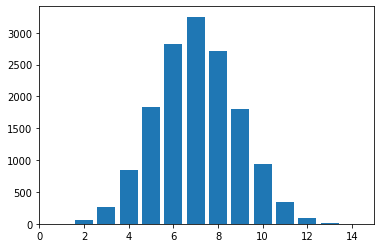

In [29]:
#посмотрим на распределение длин тайтлов
from collections import Counter

extr = lambda x: [line.split('\t')[x] for line in train_lines]

title_lens = [len(text.split(' ')) for text in extr(1)]
text_lens = [len(text.split(' ')) for text in extr(2)]

title_len_counter = Counter(title_lens)
text_len_counter = Counter(text_lens)

from matplotlib import pyplot as plt
%matplotlib inline
plt.bar(title_len_counter.keys(), title_len_counter.values(), )
plt.xlim(0, 15);

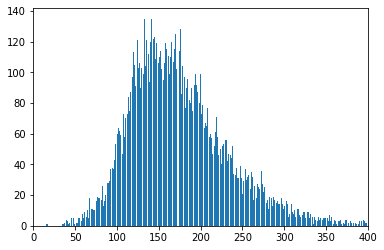

In [31]:
#посмотрим на распределение длин текстов

from matplotlib import pyplot as plt
%matplotlib inline
plt.bar(text_len_counter.keys(), text_len_counter.values(), )
plt.xlim(0, 400);

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

ru_stop_words = stopwords.words('russian')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vchigur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
from sklearn.pipeline import Pipeline

tf_idf = TfidfVectorizer(max_df=0.7, min_df=5, stop_words=ru_stop_words)

# линейный классификатор
clf = SGDClassifier()

parameters = {
    'loss': ('log', 'hinge'),
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'alpha': [0.001, 0.0001, 0.00001, 0.000001]
}

gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)

pipeline = Pipeline([('tf-idf', tf_idf), ('gs_clf', gs_clf)])

lines = [row.split('\t') for row in train_lines]
labels = [text[0] for text in lines]
titles_texts = [' '.join(text[1].split(' ') + text[2].split(' ')) for text in lines] 

data_train = pd.DataFrame(list(zip(labels,  titles_texts)), columns =['labels', 'texts'])

data_train.head()

,labels,texts
0,sport,овечкин пожертвовать детский хоккейный школа а...
1,culture,рекордно дорогой статуя майя признать подделка...
2,science,представить флагман в защитить корпус южнокоре...
3,sport,с футболист спартак снять четырехматчевой диск...
4,media,объединиться с интернетиздание объявить о свой...


In [60]:
lines = [row.split('\t') for row in test_lines]
labels = [text[0] for text in lines]
titles_texts = [' '.join(text[1].split(' ') + text[2].split(' ')) for text in lines] 

data_test = pd.DataFrame(list(zip(labels,  titles_texts)), columns =['labels', 'texts'])

data_test.head()

,labels,texts
0,culture,жительница ямал победить в первый песенный кон...
1,media,почти половина пользователь никогда не писать ...
2,media,билайн начать реклама роуминг под песенка трол...
3,business,потерять миллиард евро изз отмена южный поток ...
4,culture,вино дизель назвать форсаж достойный оскар акт...


In [62]:
from sklearn import metrics

fitted = pipeline.fit(data_train['texts'], data_train['labels'])

pred = pipeline.predict(data_test['texts'])

score = metrics.f1_score(data_test['labels'], pred, average='macro')

print(score)

/home/vchigur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.841682589967921


In [64]:
best_params_svc = gs_clf.best_params_

print(best_params_svc)

{'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}


In [73]:
b_clf = MultinomialNB()

pipeline = Pipeline([('tf-idf', tf_idf), ('b_clf', b_clf)])

fitted = pipeline.fit(data_train['texts'], data_train['labels'])

pred = pipeline.predict(data_test['texts'])

score = metrics.f1_score(data_test['labels'], pred, average='macro')

print(score)

0.642296143078799


/home/vchigur/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
